In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [4]:
import os

In [6]:
files = os.listdir(os.curdir)
files

['dane',
 'archive.zip',
 'Analiza-danych.ipynb',
 'login_file.json',
 'archive',
 'Analiza danych',
 'DL.ipynb',
 '.ipynb_checkpoints']

In [109]:
df = pd.read_csv('/home/tomo/krypto/dane/xlmusd2.csv')
df = df.set_index('time')

In [111]:
df

,time.1,open,close,high,low,volume,slope,signal,min
time,,,,,,,,,
2018-05-01 11:27:00,1525174020000,0.45000,0.44989,0.45000,0.44989,20080.000000,0.017080,2.0,0
2018-05-01 11:28:00,1525174080000,0.46660,0.46660,0.46660,0.46660,2231.749404,0.017851,2.0,1
2018-05-01 11:29:00,1525174140000,0.45000,0.45000,0.45000,0.45000,250.000000,0.020869,2.0,2
2018-05-01 11:30:00,1525174200000,0.45998,0.45998,0.45998,0.45998,200.000000,0.021373,2.0,3
2018-05-01 11:31:00,1525174260000,0.45878,0.45878,0.45878,0.45878,2300.000000,0.023025,2.0,4
...,...,...,...,...,...,...,...,...,...
2021-04-10 06:20:00,1618035600000,0.50138,0.49995,0.50191,0.49995,58125.931941,NaN,NaN,267525
2021-04-10 06:21:00,1618035660000,0.50000,0.49989,0.50000,0.49989,667.207260,NaN,NaN,267526
2021-04-10 06:22:00,1618035720000,0.50000,0.50000,0.50000,0.50000,0.000008,NaN,NaN,267527


In [110]:
df = df.set_index('time')

KeyError: "None of ['time'] are in the columns"

In [112]:
training_set = df[:'2020'].iloc[:,1:2].values
test_set = df['2020':].iloc[:,1:2].values

In [24]:
df.columns

Index(['time.1', 'open', 'close', 'high', 'low', 'volume', 'slope', 'signal',
       'min'],
      dtype='object')

In [28]:
df['2020':].loc[:,['time.1', 'open', 'close', 'high', 'low', 'volume', 'signal']]

,time.1,open,close,high,low,volume,signal
time,,,,,,,
2020-01-01 00:01:00,1577836860000,0.045138,0.045138,0.045138,0.045138,823.142363,1.0
2020-01-01 00:03:00,1577836980000,0.045031,0.045023,0.045037,0.045023,5699.162900,1.0
2020-01-01 00:04:00,1577837040000,0.045001,0.045001,0.045001,0.045001,474.896100,1.0
2020-01-01 00:05:00,1577837100000,0.044995,0.044994,0.044995,0.044994,2244.576100,1.0
2020-01-01 01:43:00,1577842980000,0.045251,0.045251,0.045251,0.045251,300.828366,1.0
...,...,...,...,...,...,...,...
2021-04-10 06:20:00,1618035600000,0.501380,0.499950,0.501910,0.499950,58125.931941,NaN
2021-04-10 06:21:00,1618035660000,0.500000,0.499890,0.500000,0.499890,667.207260,NaN
2021-04-10 06:22:00,1618035720000,0.500000,0.500000,0.500000,0.500000,0.000008,NaN


In [31]:
training_set

array([[0.45    ],
       [0.4666  ],
       [0.45    ],
       ...,
       [0.04518 ],
       [0.045059],
       [0.045138]])

In [37]:
df

,time.1,open,close,high,low,volume,slope,signal,min
time,,,,,,,,,
2018-05-01 11:27:00,1525174020000,0.45000,0.44989,0.45000,0.44989,20080.000000,0.017080,1.0,0
2018-05-01 11:28:00,1525174080000,0.46660,0.46660,0.46660,0.46660,2231.749404,0.017851,1.0,1
2018-05-01 11:29:00,1525174140000,0.45000,0.45000,0.45000,0.45000,250.000000,0.020869,1.0,2
2018-05-01 11:30:00,1525174200000,0.45998,0.45998,0.45998,0.45998,200.000000,0.021373,1.0,3
2018-05-01 11:31:00,1525174260000,0.45878,0.45878,0.45878,0.45878,2300.000000,0.023025,1.0,4
...,...,...,...,...,...,...,...,...,...
2021-04-10 06:20:00,1618035600000,0.50138,0.49995,0.50191,0.49995,58125.931941,NaN,NaN,267525
2021-04-10 06:21:00,1618035660000,0.50000,0.49989,0.50000,0.49989,667.207260,NaN,NaN,267526
2021-04-10 06:22:00,1618035720000,0.50000,0.50000,0.50000,0.50000,0.000008,NaN,NaN,267527


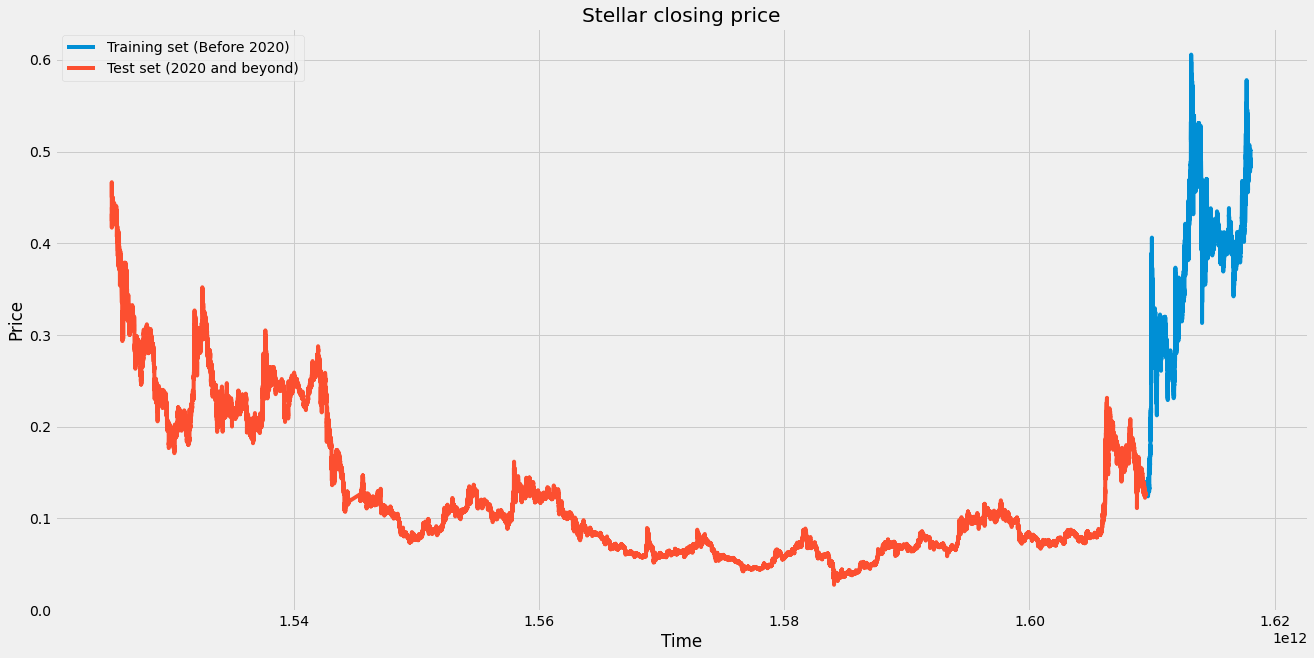

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df['time.1']['2021':], df['close']['2021':], label = 'Test set (Before 2020)')
plt.plot(df['time.1'][:'2021'], df['close'][:'2021'] , label = 'Training set (2020 and beyond)')

plt.xlabel('Time')
# Set the y axis label of the current axis.
plt.ylabel('Price')
# Set a title of the current axes.
plt.title('Stellar closing price')
# show a legend on the plot

plt.legend()
# Display a figure.
plt.show()

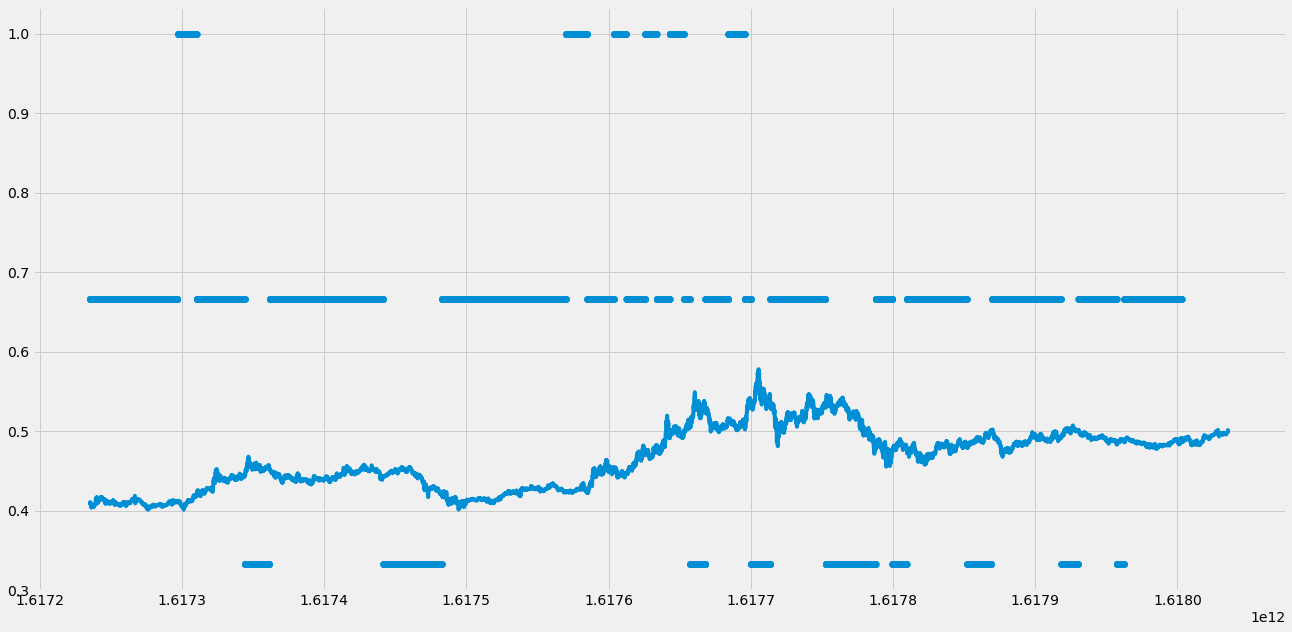

In [113]:
plt.figure(figsize=(20,10))
plt.plot(df['time.1']['2021-04':], df['close']['2021-04':])
plt.scatter(df['time.1']['2021-04':], df['signal']['2021-04':]/3)
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [ ]:
past_history = 1440
future_target = 0

TRAIN_SPLIT = int(len(norm_data) * 0.8)


x_train, y_train = univariate_data(norm_data,
                                   0,
                                   TRAIN_SPLIT,
                                   past_history,
                                   future_target)

x_test, y_test = univariate_data(norm_data,
                                 TRAIN_SPLIT,
                                 None,
                                 past_history,
                                 future_target)

In [114]:
wybrane = df.drop(columns=(['time.1', 'open', 'high', 'low', 'slope','min']))
wybrane.columns

Index(['close', 'volume', 'signal'], dtype='object')

In [115]:
test_set = wybrane['2020':].values
train_set = wybrane[:'2020'].values
print(test_set)
print(test_set[:3,1])

[[4.51380000e-02 8.23142363e+02 2.00000000e+00]
 [4.50230000e-02 5.69916290e+03 2.00000000e+00]
 [4.50010000e-02 4.74896100e+02 2.00000000e+00]
 ...
 [5.00000000e-01 8.00000000e-06            nan]
 [5.00640000e-01 3.36543367e+01            nan]
 [5.00650000e-01 1.00000000e+03            nan]]
[ 823.142363 5699.1629    474.8961  ]


In [54]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set[i-60:i,:6])
    y_train.append(training_set[i,6])
X_train, y_train = np.array(X_train), np.array(y_train)
y_train

array([1., 1., 1., ..., 3., 3., 3.])

In [116]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_test = []
y_test = []
for i in range(60,2769):
    X_test.append(test_set[i-60:i,:2])
    y_test.append(test_set[i,2])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(X_test)

(2709, 60, 2)
[[[4.51380000e-02 8.23142363e+02]
  [4.50230000e-02 5.69916290e+03]
  [4.50010000e-02 4.74896100e+02]
  ...
  [4.53270000e-02 1.26231849e+03]
  [4.52730000e-02 2.98837801e+03]
  [4.50560000e-02 6.20042560e+02]]

 [[4.50230000e-02 5.69916290e+03]
  [4.50010000e-02 4.74896100e+02]
  [4.49940000e-02 2.24457610e+03]
  ...
  [4.52730000e-02 2.98837801e+03]
  [4.50560000e-02 6.20042560e+02]
  [4.51840000e-02 7.05011456e+03]]

 [[4.50010000e-02 4.74896100e+02]
  [4.49940000e-02 2.24457610e+03]
  [4.52510000e-02 3.00828366e+02]
  ...
  [4.50560000e-02 6.20042560e+02]
  [4.51840000e-02 7.05011456e+03]
  [4.49839400e-02 1.30043184e+03]]

 ...

 [[5.97210000e-02 1.33890000e+03]
  [5.96960000e-02 5.93424821e+02]
  [5.98312200e-02 3.34460000e+03]
  ...
  [6.35410000e-02 2.34744426e+03]
  [6.37720000e-02 1.31020063e+03]
  [6.36010000e-02 7.99000000e+03]]

 [[5.96960000e-02 5.93424821e+02]
  [5.98312200e-02 3.34460000e+03]
  [6.01970000e-02 1.00000000e+03]
  ...
  [6.37720000e-02 1.3102

In [117]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(train_set[i-60:i,:2])
    y_train.append(train_set[i,2])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)

(2709, 60, 2)


In [118]:
print(X_test.shape)

(2709, 60, 2)


In [10]:
# Reshaping X_train for efficient modelling
#X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

ValueError: cannot reshape array of size 975240 into shape (2709,60,1)

In [123]:
# The LSTM architecture
LSTM_model = Sequential()
# First LSTM layer with Dropout regularisation
LSTM_model.add(LSTM(units=120, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
LSTM_model.add(Dropout(0.2))
# Second LSTM layer
LSTM_model.add(LSTM(units=50, return_sequences=True))
#LSTM_model.add(Dropout(0.2))
# Third LSTM layer
#LSTM_model.add(LSTM(units=50, return_sequences=True))
#LSTM_model.add(Dropout(0.2))
# Fourth LSTM layer
#LSTM_model.add(LSTM(units=50))
#LSTM_model.add(Dropout(0.2))
#The output layer
LSTM_model.add(Dense(units=1))

# Compiling the RNN
LSTM_model.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
history = LSTM_model.fit(X_train,y_train,epochs=50,batch_size=70, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/50
39/39 - 13s - loss: 0.5749 - val_loss: 1.1921
Epoch 2/50
39/39 - 9s - loss: 0.3800 - val_loss: 1.1494
Epoch 3/50
39/39 - 9s - loss: 0.3938 - val_loss: 0.9956
Epoch 4/50
39/39 - 10s - loss: 0.3623 - val_loss: 0.9616
Epoch 5/50
39/39 - 11s - loss: 0.3507 - val_loss: 0.9546
Epoch 6/50
39/39 - 11s - loss: 0.3473 - val_loss: 0.9267
Epoch 7/50
39/39 - 11s - loss: 0.3395 - val_loss: 0.9148
Epoch 8/50
39/39 - 11s - loss: 0.3351 - val_loss: 0.9063
Epoch 9/50
39/39 - 11s - loss: 0.3316 - val_loss: 0.9001
Epoch 10/50
39/39 - 11s - loss: 0.3291 - val_loss: 0.8988
Epoch 11/50
39/39 - 9s - loss: 0.3275 - val_loss: 0.8899
Epoch 12/50
39/39 - 10s - loss: 0.3249 - val_loss: 0.8870
Epoch 13/50
39/39 - 11s - loss: 0.3208 - val_loss: 0.9025
Epoch 14/50
39/39 - 11s - loss: 0.3260 - val_loss: 0.8848
Epoch 15/50
39/39 - 11s - loss: 0.3218 - val_loss: 0.8797
Epoch 16/50
39/39 - 11s - loss: 0.3196 - val_loss: 0.8768
Epoch 17/50
39/39 - 11s - loss: 0.3182 - val_loss: 0.8734
Epoch 18/50
39/39 - 11s - 

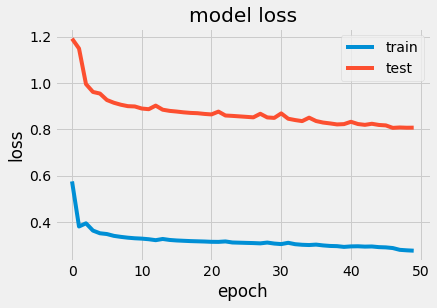

In [124]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [125]:
LSTM_model.save('third_LSTM_model')

INFO:tensorflow:Assets written to: third_LSTM_model/assets


INFO:tensorflow:Assets written to: third_LSTM_model/assets


In [12]:
from keras.models import load_model

In [13]:
LSTM_model = load_model('first_LSTM_model')

In [122]:
print(X_test.shape)

(2709, 60, 2)


In [18]:
X_test[0].shape


(60, 6)

In [126]:
X_test_chunk = X_test[0]

In [94]:
X_test_chunk.shape

(60, 2)

In [127]:
X_test_chunk_r = np.reshape(X_test_chunk, (1,60,2))

In [96]:
X_test_chunk_r.shape

(1, 60, 2)

In [128]:
pred_signal = LSTM_model.predict(X_test_chunk_r)

In [129]:
print(np.round(pred_signal[0]))

[[1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [131]:
X_test_chunk_r

array([[[4.51380000e-02, 8.23142363e+02],
        [4.50230000e-02, 5.69916290e+03],
        [4.50010000e-02, 4.74896100e+02],
        [4.49940000e-02, 2.24457610e+03],
        [4.52510000e-02, 3.00828366e+02],
        [4.51950000e-02, 2.16116585e+02],
        [4.53980000e-02, 4.40978876e+02],
        [4.54180000e-02, 1.25894520e+02],
        [4.53370000e-02, 9.57051087e+03],
        [4.53350000e-02, 4.91813600e+02],
        [4.51410000e-02, 1.47778623e+03],
        [4.49740000e-02, 5.98006883e+04],
        [4.51290000e-02, 2.58209299e+03],
        [4.51291100e-02, 1.44390945e+02],
        [4.51040000e-02, 9.56490810e+03],
        [4.50906200e-02, 2.59365000e+02],
        [4.50860000e-02, 3.75000000e+03],
        [4.50220000e-02, 7.37036397e+03],
        [4.49030000e-02, 1.46048019e+04],
        [4.49079500e-02, 4.70000000e+03],
        [4.49870000e-02, 6.57755583e+02],
        [4.49840000e-02, 7.33190300e+02],
        [4.50180000e-02, 4.54413541e+03],
        [4.50220000e-02, 2.5000000

In [132]:
y_test[60]

3.0

In [90]:
X_test

array([[[4.51380000e-02, 8.23142363e+02],
        [4.50230000e-02, 5.69916290e+03],
        [4.50010000e-02, 4.74896100e+02],
        ...,
        [4.53270000e-02, 1.26231849e+03],
        [4.52730000e-02, 2.98837801e+03],
        [4.50560000e-02, 6.20042560e+02]],

       [[4.50230000e-02, 5.69916290e+03],
        [4.50010000e-02, 4.74896100e+02],
        [4.49940000e-02, 2.24457610e+03],
        ...,
        [4.52730000e-02, 2.98837801e+03],
        [4.50560000e-02, 6.20042560e+02],
        [4.51840000e-02, 7.05011456e+03]],

       [[4.50010000e-02, 4.74896100e+02],
        [4.49940000e-02, 2.24457610e+03],
        [4.52510000e-02, 3.00828366e+02],
        ...,
        [4.50560000e-02, 6.20042560e+02],
        [4.51840000e-02, 7.05011456e+03],
        [4.49839400e-02, 1.30043184e+03]],

       ...,

       [[5.97210000e-02, 1.33890000e+03],
        [5.96960000e-02, 5.93424821e+02],
        [5.98312200e-02, 3.34460000e+03],
        ...,
        [6.35410000e-02, 2.34744426e+03],
     

In [133]:
pred_signals = LSTM_model.predict(X_test_chunk_r)

In [134]:
pred_signals

array([[[1.4348242],
        [1.5243508],
        [1.5894198],
        [1.5961387],
        [1.595364 ],
        [1.5904207],
        [1.5954553],
        [1.5804095],
        [1.595655 ],
        [1.5947626],
        [1.5947766],
        [1.5945786],
        [1.59454  ],
        [1.5812087],
        [1.5952357],
        [1.5915444],
        [1.5949941],
        [1.5944786],
        [1.5944612],
        [1.5944152],
        [1.594363 ],
        [1.594364 ],
        [1.5943819],
        [1.5943855],
        [1.5943855],
        [1.5943791],
        [1.5943816],
        [1.5943841],
        [1.5943835],
        [1.5943837],
        [1.5941256],
        [1.5944121],
        [1.5943652],
        [1.5943519],
        [1.594361 ],
        [1.5943658],
        [1.5943673],
        [1.5943675],
        [1.594352 ],
        [1.5943362],
        [1.5943612],
        [1.5943638],
        [1.5943638],
        [1.5790762],
        [1.5840424],
        [1.5973574],
        [1.5949693],
        [1.57

In [135]:
pred_signals.reshape(60)

array([1.4348242, 1.5243508, 1.5894198, 1.5961387, 1.595364 , 1.5904207,
       1.5954553, 1.5804095, 1.595655 , 1.5947626, 1.5947766, 1.5945786,
       1.59454  , 1.5812087, 1.5952357, 1.5915444, 1.5949941, 1.5944786,
       1.5944612, 1.5944152, 1.594363 , 1.594364 , 1.5943819, 1.5943855,
       1.5943855, 1.5943791, 1.5943816, 1.5943841, 1.5943835, 1.5943837,
       1.5941256, 1.5944121, 1.5943652, 1.5943519, 1.594361 , 1.5943658,
       1.5943673, 1.5943675, 1.594352 , 1.5943362, 1.5943612, 1.5943638,
       1.5943638, 1.5790762, 1.5840424, 1.5973574, 1.5949693, 1.5791261,
       1.5959694, 1.5952698, 1.5807902, 1.5960119, 1.5945945, 1.5954976,
       1.5951723, 1.5920022, 1.5955685, 1.5951802, 1.5951878, 1.5951109],
      dtype=float32)

In [103]:
len(pred_signals)

1

In [86]:
len(y_test)

2709

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 60, 1)

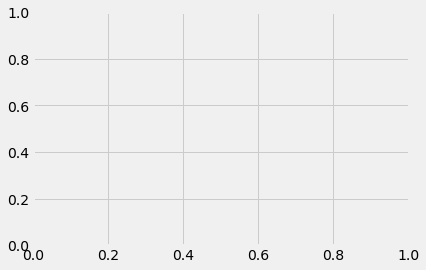

In [136]:
plt.plot(pred_signals)
plt.plot(y_test)
plt.show()

In [ ]:
https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru/comments